# **Python libraries**

In [ ]:
# !pip install datawig
# !pip install markdown
# !pip install tabulate

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import markdown 
from tabulate import tabulate
sns.set() 
from prettytable import PrettyTable
from collections import Counter
import scipy
import warnings
warnings.filterwarnings("ignore")
from sklearn.neighbors import LocalOutlierFactor, KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support, roc_curve, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


# **Load Data**

In [ ]:
# loading original data into dataframe and check shape
diabetic_data = pd.read_csv('/content/diabetic_data.csv')
print(diabetic_data.shape)
# make a copy of the dataframe for preprocessing
df = diabetic_data.copy(deep=True)

(101766, 50)


#**Dataset Information**

##**Features infomation**


####**Patient identifiers**

**encounter_id** — A unique identifier for each admission

**patient_nbr** — Unique identifier for each patient

####**Patient demographics**

**race, gender, ‘age, weight** — Basic demographic information associated with each patient

**payer_code**— Identifies which health insurance (Blue Cross / Blue Shield, Medicare and self-pay) the patient holds

###**Patient Medical History**
**number_outpatient** — Number of outpatient visits by the patient in the year prior to the current encounter

**number_inpatient** — Number of inpatient visits by the patient in the year prior to the current encounter

**number_emergency** — Number of emergency visits by the patient in the year prior to the current encounter

###**Clinical Results**
**max_glu_serum** — Indicates the results of the glucose serum test

**A1cresult** — Indicates results of the A1C test


###**Patient Admission Details**
**medical_speacialty** — Identifies the specialty of the physician admitting the patient (cardiology, internal medicine, family/general practice, etc.)

**diag_1, diag_2 and diag_3** — ICD9 codes for the primary, secondary and tertiary diagnoses of the patient

**time_in_hospital** — Number of days between admission and discharge for the patient

**number_diagnoses** — Total number of diagnoses entered for the patient

**num_lab_procedures** — Number of lab procedures performed in the current encounter
**num_procedures** — Number of non-lab procedures performed in the current encounter

**num_medications** — Number of distinct medications performed in the current encounter

###**Medication Details**

**diabetesMed** — Indicates if any diabetes medication was prescribed

**change** — Indicates if there was a change in diabetic medications

**medications** — 24 features for medications that Indicates whether the dosage for the medicines was changed in any manner during the encounter. For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed

###**Admission and Discharge details**
**admission_type_id , admission_source_id**  - identify and what type of admission this was (emergency, urgent, elective, etc.)

and who referred the patient to the hospital (physical referral, emergency room, transfer from a hospital, etc.) and what type of admission this was (emergency, urgent, elective, etc.)

**discharge_disposition_id** identifies where the patient was discharge to after treatment (discharged to home, expired, etc.)


In [ ]:
#@title
admission_data = {1:"Emergency",
2:"Urgent",
3:"Elective",
4:"Newborn",
5:"Not Available",
6:"NULL",
7:"Trauma Center",
8:"Not Mapped"}

admission = pd.DataFrame.from_dict(admission_data, orient='index',columns = ["description"])
admission.index.name = "admission_type_id"
admission = admission
print(tabulate(admission, headers='keys', tablefmt='psql'))

+---------------------+---------------+
|   admission_type_id | description   |
|---------------------+---------------|
|                   1 | Emergency     |
|                   2 | Urgent        |
|                   3 | Elective      |
|                   4 | Newborn       |
|                   5 | Not Available |
|                   6 | NULL          |
|                   7 | Trauma Center |
|                   8 | Not Mapped    |
+---------------------+---------------+


In [ ]:
#@title
admission_source_data ={
1:"Physician Referral",
2:"Clinic Referral",
3:"HMO Referral",	
4:"Transfer from a hospital",
5:"Transfer from a Skilled Nursing Facility (SNF)	",
6:"Transfer from another health care facility:",
7:"Emergency Room",
8:"Court/Law Enforcement",
9:"Not Available",
10:"Transfer from critial access hospital",
11:"Normal Delivery",
12:"Premature Delivery",	
13:"Sick Baby:",
14:"Extramural Birth",
15:"Not Available:",
17:"NULL",
18:"Transfer From Another Home Health Agency",	
19:"Readmission to Same Home Health Agency",	
20:"Not Mapped",
21:"Unknown/Invalid",
22:"Transfer from hospital inpt/same fac reslt in a sep claim	",
23:"Born inside this hospital",	
24:"Born outside this hospital",
25:"Transfer from Ambulatory Surgery Center",	
26:"Transfer from Hospice"}
admission_source = pd.DataFrame.from_dict(admission_source_data, orient='index',columns = ["description"])
admission_source.index.name = "admission_source_id"
admission_source = admission_source.sample(5)
print(tabulate(admission_source, headers='keys', tablefmt='psql'))

+-----------------------+-----------------------------------------------------------+
|   admission_source_id | description                                               |
|-----------------------+-----------------------------------------------------------|
|                    22 | Transfer from hospital inpt/same fac reslt in a sep claim |
|                    24 | Born outside this hospital                                |
|                    18 | Transfer From Another Home Health Agency                  |
|                    20 | Not Mapped                                                |
|                    14 | Extramural Birth                                          |
+-----------------------+-----------------------------------------------------------+


In [ ]:
#@title
data = {1:"Discharged to home",
2:"Discharged/transferred to another short term hospital",					
3:"Discharged/transferred to SNF",			
4:"Discharged/transferred to ICF",				
5:"Discharged/transferred to another type of inpatient care institution",				
6:"Discharged/transferred to home with home health service", 
7:"Left AMA",				
8:"Discharged/transferred to home under care of Home IV provider",					
9:"Admitted as an inpatient to this hospital",				
10:"Neonate discharged to another hospital for neonatal aftercare",
11:"Expired",					
12:"Still patient or expected to return for outpatient services",			
13:"Hospice / home",				
14:"Hospice / medical facility",				
15:"Discharged/transferred within this institution to Medicare approved swing bed",				
16:"Discharged/transferred/referred another institution for outpatient services",			
17:"Discharged/transferred/referred to this institution for outpatient services",			
18:"NULL",				
19:"Expired at home. Medicaid only, hospice",					
20:"Expired in a medical facility. Medicaid only, hospice",					
21:"Expired, place unknown. Medicaid only, hospice",			
22:"Discharged/transferred to another rehab fac including rehab units of a hospital",
23:"Discharged/transferred to a long term care hospital",					
24:"Discharged/transferred to a nursing facility certified under Medicaid but not certified under Medicare",
25:"Not Mapped",			
26:"Unknown/Invalid",		
27:"Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere",				
28:"Discharged/transferred to a federal health care facility",
29:"Discharged/transferred/referred to a psychiatric hospital of psychiatric distinct part unit of a hospital",				
30:"Discharged/transferred to a Critical Access Hospital (CAH)"}

discharge = pd.DataFrame.from_dict(data, orient='index',columns = ["discharge description"])
discharge.index.name = "discharge_disposition_id"
discharge = discharge.sample(5)
print(tabulate(discharge, headers='keys', tablefmt='psql'))

+----------------------------+---------------------------------------------------------------+
|   discharge_disposition_id | discharge description                                         |
|----------------------------+---------------------------------------------------------------|
|                         13 | Hospice / home                                                |
|                         19 | Expired at home. Medicaid only, hospice                       |
|                         10 | Neonate discharged to another hospital for neonatal aftercare |
|                         30 | Discharged/transferred to a Critical Access Hospital (CAH)    |
|                          6 | Discharged/transferred to home with home health service       |
+----------------------------+---------------------------------------------------------------+


###**Readmission Indicator - Target Feature**

**readmitted** — Indicates whether a patient was readmitted after a particular admission. 3 levels for this variable:

**NO** — No readmission

**<30** — Readmission within 30 days

**>30**— Readmission after more than 30 days

###**Dataset Descriptive information**

It is important to know if a patient will be readmitted in some hospital. The reason is that you can change the treatment, in order to avoid a readmission.

**The Dataset contains :**

**101766** Records of Diabetes Patients -

**71518 unique** Patients.

**30248 readmitted Patients**, They will be our Test group.

--

**Also:**

**54864** - Patients Have No readmission reported

**35545** - Patients Have readmitted in less than 30 days

**11357** - Patients Have readmitted in more than 30 days

##**Dataset Information**

The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals. 

It includes over 50 features representing patient and hospital outcomes. 

Information was extracted from the database for encounters that satisfied the following criteria.

(1) It is an inpatient encounter (a hospital admission).

(2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

(3) The length of stay was at least 1 day and at most 14 days.

(4) Laboratory tests were performed during the encounter.

(5) Medications were administered during the encounter.



In [ ]:
print('--Examine the data types--')
print(diabetic_data.info())
print(diabetic_data.describe())

--Examine the data types--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766

In [ ]:
print('--sample of the dataframe--')
diabetic_data.sample(5).T

--sample of the dataframe--


,83121,27065,30846,11638,100365
encounter_id,259830174,88765026,99440664,48096210,424929914
patient_nbr,39392334,6917454,24152841,840600,84711060
race,Caucasian,?,AfricanAmerican,Caucasian,Caucasian
gender,Female,Male,Female,Female,Male
age,[80-90),[50-60),[70-80),[50-60),[60-70)
weight,?,?,?,?,?
admission_type_id,1,2,3,3,1
discharge_disposition_id,1,1,3,1,6
admission_source_id,7,1,1,1,7
time_in_hospital,1,2,4,1,4


In [ ]:
print("--unique values in each column--")
for col in diabetic_data.columns:
    print("\n","column",col,":","---->",diabetic_data[col].unique(),"have",len(diabetic_data[col].unique()),"unique value(s)")
    

--unique values in each column--

 column encounter_id : ----> [  2278392    149190     64410 ... 443854148 443857166 443867222] have 101766 unique value(s)

 column patient_nbr : ----> [  8222157  55629189  86047875 ... 140199494 120975314 175429310] have 71518 unique value(s)

 column race : ----> ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic'] have 6 unique value(s)

 column gender : ----> ['Female' 'Male' 'Unknown/Invalid'] have 3 unique value(s)

 column age : ----> ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)'] have 10 unique value(s)

 column weight : ----> ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200'] have 10 unique value(s)

 column admission_type_id : ----> [6 1 2 3 4 5 8 7] have 8 unique value(s)

 column discharge_disposition_id : ----> [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27] have 26 unique value(s)

 column 

Missing values in this dataset are represented by ‘?’

Several columns have missing values.
 

In [ ]:
# calculate missing values, which indicates as '?'
for col in diabetic_data.columns:
    if diabetic_data[col].dtype == object:
         print(col,diabetic_data[col][diabetic_data[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [ ]:
print('gender', diabetic_data['gender'][diabetic_data['gender'] == 'Unknown/Invalid'].count())

gender 3


|                   |   missing_values |   percent_missing |
|:------------------|-----------------:|------------------:|
| weight            |            98569 |             96.86 |
| medical_specialty |            49949 |             49.08 |
| payer_code        |            40256 |             39.56 |
| race              |             2273 |              2.23 |
| diag_3            |             1423 |              1.42 |
| diag_2            |              358 |              0.35 |
| diag_1            |               21 |              0.02 |
| gender            |                3 |              0.00 |


#**Preprocessing**

###**Dealing with missing Values**

Weight is missing 96% records. 

Payer code and Medical Specialty of treating physician also have 40–50% missing
values.

We decided to drop the records.

In [ ]:
df = df.drop(['weight','payer_code','medical_specialty'], axis = 1)

Primary (diag_1), Secondary (diag_2) and Additional (diag_3) diagnoses were have very few missing values. Technically, if all three are missing, that’s bad data. So we only drop those records where all three diagnoses are missing.

Gender has only 3 missing or invalid values so we decided to drop these records.

Also, one more cleaning step that depends on understanding the data and some common sense: since we are trying to predict readmissions, those patients who died during this hospital admission or addmitted to a hospice, have zero probability of readmission. So we removed those records (discharge_disposition = 11,13,14,19,20,21).


In [ ]:
drop_Idx = set(df[(df['diag_1'] == '?') & (df['diag_2'] == '?') & (df['diag_3'] == '?')].index)
drop_Idx = drop_Idx.union(set(df['gender'][df['gender'] == 'Unknown/Invalid'].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 11].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 13].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 14].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 19].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 20].index))
drop_Idx = drop_Idx.union(set(df[df['discharge_disposition_id'] == 21].index))
new_Idx = list(set(df.index) - set(drop_Idx))
df = df.iloc[new_Idx]
#df.shape
#(99340, 47)

features diag_1 , diag_2, diag_3 have mixed type values like 11, 'V25' 'V26' 'V43' So we are replacing missing valuse with most common value

In [ ]:
diag_1 = Counter(list(df['diag_1'])).most_common(1)[0][0]
diag_2 = Counter(list(df['diag_2'])).most_common(1)[0][0]
diag_3 = Counter(list(df['diag_3'])).most_common(1)[0][0]

df['diag_1'] = df['diag_1'].apply(lambda x : diag_1 if x == '?' else x)
df['diag_2'] = df['diag_1'].apply(lambda x : diag_2 if x == '?' else x)
df['diag_3'] = df['diag_3'].apply(lambda x : diag_3 if x == '?' else x)

 two variables citoglipton and examide all records have the same value

In [ ]:
df = df.drop(['citoglipton', 'examide'], axis = 1)

###**Feature Creation**

The data contains variables for number of inpatient (admissions), emergency room visits and outpatient visits for a given patient in the previous one year. These measures of how much hospital/clinic services a person has used in the past year. We added these three to create a new variable called service usage 

In [ ]:
df['Health_service_usage'] = df['number_outpatient'] +\
df['number_emergency'] + df['number_inpatient']

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 
        'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
        'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 
        'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']

In [ ]:
keys = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 'metformin-pioglitazone','metformin-rosiglitazone', 'glimepiride-pioglitazone', 'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide']
for col in keys:
    colname = str(col) + 'temp'
    df[colname] = df[col].apply(lambda x: 0 if (x == 'No' or x == 'Steady') else 1)
df['numchange'] = 0
for col in keys:
    colname = str(col) + 'temp'
    df['numchange'] = df['numchange'] + df[colname]
    del df[colname]

In [ ]:
df['numchange'].value_counts()

0    72320
1    25609
2     1299
3      107
4        5
Name: numchange, dtype: int64

###**Dealing with Categorical values**

The diag_1 , diag_2 , diag_3 Features are categorical features but they have 

lots unique values,We will use the International Classification of Diseases 

Given By the Centers for Disease Control and Prevention In order to create 

diagnostic groups with a similar medical background.

Circulatory --> 390–459, 785 --> Diseases of the circulatory system

Respiratory --> 460–519, 786 --> Diseases of the respiratory system

Digestive --> 520–579, 787 --> Diseases of the digestive system

Diabetes --> 250.xx --> Diabetes mellitus

Injury --> 800–999 --> Injury and poisoning

Musculoskeletal --> 710–739 --> Diseases of the musculoskeletal system and connective tissue

Genitourinary --> 580–629, 788 --> Diseases of the genitourinary system

Neoplasms --> 140–239 --> Neoplasms

Pregnecy --> 630–679 --> Complications of pregnancy, childbirth, and the puerperium

In [ ]:
df['diag_1'].nunique()

715

In [ ]:
print(df['diag_1'].nunique())  
print(df['diag_2'].nunique())  
print(df['diag_3'].nunique())  

df['diag_1'] = df['diag_1'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_2'] = df['diag_2'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))

df['diag_3'] = df['diag_3'].apply(lambda x : 'other' if (str(x).find('V') != -1 or str(x).find('E') != -1)  
                                        else ('circulatory' if int(float(x)) in range(390, 460) or int(float(x)) == 785
                                        else     ('respiratory' if int(float(x)) in range(460, 520) or int(float(x)) == 786
                                        else     ('digestive'   if int(float(x)) in range(520, 580) or int(float(x)) == 787
                                        else     ('diabetes'    if int(float(x)) == 250
                                        else     ('injury'      if int(float(x)) in range(800, 1000)
                                        else ('musculoskeletal' if int(float(x)) in range(710, 740)
                                        else ('genitourinary'   if int(float(x)) in range(580, 630) or int(float(x)) == 788
                                        else ('neoplasms'       if int(float(x)) in range(140, 240)
                                        else ('pregnecy'        if int(float(x)) in range(630, 680)
                                        else 'other'))))))))))  

print(np.unique(df['diag_1']), '\n')           
print(np.unique(df['diag_2']), '\n')
print(np.unique(df['diag_3']), '\n')         

715
715
786
['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnecy' 'respiratory'] 



The age feature is not categorical, but ordinal. We convert it to numbers and

 treat it as a numerical attribute.

 We convert an age attribute to the average of each group

In [ ]:
ageDict = {'[0-10)' : 5,
'[10-20)' : 15,
'[20-30)' : 25, 
'[30-40)' : 35, 
'[40-50)' : 45, 
'[50-60)' : 55,
'[60-70)' : 65, 
'[70-80)' : 75,
'[80-90)' : 85,
'[90-100)' : 95}

df['age'] = df['age'].apply(lambda x : ageDict[x])


Admission Source ID can be converted into small number of categories

1 = [2, 3] - Non-Health Care Facility(Physician Referral)

4 = [5, 6, 10, 22, 25] - Transfer from hospital (Different Facility)

9 = [15, 17, 20, 21] - Information not available 

11 = [13, 14] - Abnormal birth or birth in abnormal conditions  (Premature delivery/Sick baby/Extramural birth)

Type ID can be converted into small number of categories

1 = [2, 7] - Emergency 

3 = [3] - Elective 

4 = [4] - New Born

9 =  [5, 6, 8] - Not Mapped/null


Discharge Disposition ID has lots of distinct we will convert them into small number of categories using the cdc 	Discharge Disposition system. <br>

1 = [6, 8, 9]  -  home or self care <br>
2 = [3, 4, 5, 22, 23, 24]  - Discharged/transferred to a short-term general hospital for inpatient care <br>
10 = [12, 15, 16, 17] - Discharged/transferred to a nursing facility  <br>
18 = [25, 26] - Discharged/transferred to another Type of Health Care Institution not Defined Elsewhere" <br>
</p>

In [ ]:
df['gender'] = df['gender'].replace('Male', 1)
df['gender'] = df['gender'].replace('Female', 0)

df['admission_source_id'] = df['admission_source_id'].apply(lambda x : 1 if int(x) in [2, 3]
                                                            else ( 4 if int(x) in [5, 6, 10, 22, 25]
                                                            else ( 9 if int(x) in [15, 17, 20, 21]
                                                            else ( 11 if int(x) in [13, 14]
                                                            else int(x) ))))

df['admission_type_id'] = df['admission_type_id'].apply(lambda x : 1 if int(x) in [2, 7]
                                                            else ( 9 if int(x) in [5, 6, 8]
                                                            else int(x) ))

df['discharge_disposition_id'] = df['discharge_disposition_id'].apply(lambda x : 1 if int(x) in [6, 8, 9] 
                                                                           else ( 2 if int(x) in [3, 4, 5, 14, 22, 23, 24]
                                                                           else ( 10 if int(x) in [12, 15, 16, 17]
                                                                           else ( 18 if int(x) in [25, 26] 
                                                                           else int(x) ))))

print(np.unique(df['discharge_disposition_id']))
print(np.unique(df['admission_type_id']))
print(np.unique(df['admission_source_id']))

[ 1  2  7 10 18 27 28]
[1 3 4 9]
[ 1  4  7  8  9 11]


change :
Reflects whether there has been a change in the patient's medication since the 

previous visit.

change = 1

No change = 0 

diabetesMed — Indicates if any diabetes medication was prescribed

No = -1

Yes = 1

Glucose Serum test :
A blood glucose test is used to find out if your blood sugar levels are in the healthy range. 

It is often used to help diagnose and monitor diabetes.

'>200' : 200 = indicates diabetes

'>300' : 300 = Indicates diabetes

'Norm' : 100 = Normal

'None' : 0 = test was not taken

A1C test :

An A1C test is a blood test that reflects your average blood glucose levels 

over the past 3 months

'>7' : 7

'>8' : 8

Norm : 5 = Normal

None : 0 = Test was not taken

In [ ]:
df['change'] = df['change'].apply(lambda x : 1 if x == 'Ch'
                                                 else 0)

df['diabetesMed'] = df['diabetesMed'].apply(lambda x : 0 if x == 'No'
                                            else 1) 

df['max_glu_serum'] = df['max_glu_serum'].apply(lambda x : 1 if x == '>200' 
                                                            else ( 1 if x == '>300'                                                          
                                                            else ( 0 if x == 'Norm'
                                                            else  -99)))

df['A1Cresult'] = df['A1Cresult'].apply(lambda x : 1 if x == '>7' 
                                                         else (1 if  x == '>8'                                                        
                                                         else ( 0 if x == 'Norm'
                                                         else  -99)))
print(df['change'].unique())
print(df['diabetesMed'].unique())
print(df['max_glu_serum'].unique())
print(df['A1Cresult'].unique())

[0 1]
[0 1]
[-99   1   0]
[-99   1   0]


Redmitted column has the following values:

'>30' that is patient readmitted after 30 days

 'NO' that is patient not readmitted at all

'<30' that is patient readmitted before 30 days
 
in our data we  replace 'NO' with 0 and '>30'/<30' with 1

In [ ]:
df['readmitted'].unique()
df = df.replace({"NO":0,
                         "<30":1,
                         ">30":1})
print(np.unique(df['readmitted']))

[0 1]


 24 features for medications that Indicates whether the dosage for the 

medicines was changed in any manner during the encounter. 

“up” = 1, if the dosage was increased during the encounter.

“down” = -1, if the dosage was decreased
 
“steady” =  0, if the dosage did not change

“no” = 0, if the drug was not prescribed

In [ ]:
for col in ["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide","insulin", "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]:
    df[col] = df[col].apply(lambda x : 1 if x == 'Up' 
                                              else ( 0 if x == 'Down'                                                          
                                              else (0 if x == 'Steady'
                                              else  0)))
    
print(np.unique(df[["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide", "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol", "troglitazone", "tolazamide", "insulin",\
                              "glyburide-metformin", "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]]))


[0 1]


###**Drug groups information**

**Sulfonylureas** are used primarily for the treatment of diabetes mellitus type 2. They act by increasing insulin release from the beta cells in the pancreas.
The drugs in this category are divided into two groups:

Sulfonylureas_gen1 are First-generation drug - approved before 2000

Sulfonylureas_gen1 = chlorpropamide, tolazamide, tolbutamide, acetohexamide

Sulfonylureas_gen2 are Second-generation drugs - were approved after 2000

Sulfonylureas_gen2 = glimepiride, glipizide, glyburide

The main difference between the first- and second-generation sulfonylureas is
in the way they are 'eliminated from the body. As a consequence, 
second-generation sulfonylureas are usually taken less 'frequently each day 
than first-generation sulfonylureas and generally are preferred when there is 
poor function of the kidneys. 
                  
**Meglitinides**
a shorter-acting insulin secretagogues than the sulfonylureas are, with preprandial dosing potentially achieving more physiologic insulin release and less risk for hypoglycemia, Although meglitinides are considerably more expensive than sulfonylureas, they are similar in their glycemic clinical efficacy.

Meglitinides = nateglinide, repaglinide

**Metformin**
Metformin is used to lower the blood sugar in those with type 2 diabetes by
reducing how much glucose is released from the liver, where it is stored also
helping the cells of your body to absorb more glucose from the bloodstream.

Biguanides(Metformin) = metformin

**Thiazolidinediones(TZD)**
new class of oral antidiabetic drugs that improve metabolic control in patients with type 2 diabetes through the improvement of insulin sensitivity.

Thiazolidinediones(TZD) = pioglitazone, rosiglitazone,troglitazone

**Alpha-glucosidase inhibitors**
These drugs block the breakdown of starchy foods such as bread, potatoes, and pasta, and they slow down the absorption of of some sugars, such as table sugar.
An alpha-glucosidase inhibitor will usually lower your A1c (the "average" of your blood sugar control over a few months) by about 0.5% to 0.8%.

Alpha-glucosidase inhibitors = acarbose, miglitol

**insulin**
insulin is any pharmaceutical preparation of the protein hormone insulin that is used to treat high blood glucose
insulin = insulin

**Metformin_Sulfonylureas_combo**
The combination of metformin plus sulphonylurea is widely used
Metformin_Sulfonylureas_combo = glipizide-metformin, glimepiride-pioglitazone

**Metformin_TZD_combo**
Metformin_TZD_combo = metformin-rosiglitazone, metformin-pioglitazone

###**Medication grouping**

there are 24 features that provide information about drugs that the patients receive.

the drugs are similar generic drugs from the same class, A drug may be 

classified by the chemical type of the active ingredient or by the way it is 

used to treat the patient condition. in our dataset Each drug is classified 

into groups based on the active ingredient of the drug.

In [ ]:
diabetic_meds = df[ ["Health_service_usage","numchange","metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",\
            "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol",\
            "troglitazone", "tolazamide","insulin", "glyburide-metformin", \
            "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"]]

diabetic_meds["Sulfonylureas_gen1"] = diabetic_meds["chlorpropamide"] + diabetic_meds["tolazamide"] + diabetic_meds["tolbutamide"] +\
                                      diabetic_meds["acetohexamide"] 

diabetic_meds["Sulfonylureas_gen2"] = diabetic_meds["glimepiride"] + diabetic_meds["glipizide"] + diabetic_meds["glyburide"]

diabetic_meds["Meglitinides"] = diabetic_meds["nateglinide"] + diabetic_meds["repaglinide"]

diabetic_meds["Biguanides(Metformin)"] = diabetic_meds["metformin"] 

diabetic_meds["Thiazolidinediones(TZD)"] = diabetic_meds["pioglitazone"] + diabetic_meds["rosiglitazone"] +diabetic_meds["troglitazone"]

diabetic_meds["Alpha-glucosidase inhibitors"] = diabetic_meds["acarbose"] + diabetic_meds["miglitol"]

diabetic_meds["insulin"] = diabetic_meds["insulin"] 

diabetic_meds["Metformin_Sulfonylureas_combo"] = diabetic_meds["glipizide-metformin"] + diabetic_meds["glimepiride-pioglitazone"]

diabetic_meds["Metformin_TZD_combo"] = diabetic_meds["metformin-rosiglitazone"] + diabetic_meds["metformin-pioglitazone"]

for col in ['Sulfonylureas_gen2', 'Sulfonylureas_gen1', 'Meglitinides',
       'Biguanides(Metformin)', 'Thiazolidinediones(TZD)',
       'Alpha-glucosidase inhibitors',
       'Metformin_Sulfonylureas_combo', 'Metformin_TZD_combo']:

    diabetic_meds[col] = diabetic_meds[col].apply((lambda x : 1 if x == 2 
                                              else ( -1 if x <= -2                                                           
                                             else  0)))

diabetic_meds = diabetic_meds.drop(["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",\
            "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol",\
            "troglitazone", "tolazamide", "insulin", "glyburide-metformin", \
            "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone"],axis = 1)

df = df.drop(["metformin", "repaglinide", "nateglinide", "chlorpropamide", "glimepiride", "acetohexamide",\
            "glipizide", "glyburide", "tolbutamide", "pioglitazone", "rosiglitazone", "acarbose", "miglitol",\
            "troglitazone", "tolazamide","insulin", "glyburide-metformin", \
            "glipizide-metformin", "glimepiride-pioglitazone", "metformin-rosiglitazone", "metformin-pioglitazone","Health_service_usage","numchange"],axis = 1)

diabetic_patients_dataset = pd.concat([df, diabetic_meds], axis=1, join="inner")

In [ ]:

diabetic_patients_dataset = diabetic_patients_dataset[['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'Sulfonylureas_gen1',
       'Sulfonylureas_gen2', 'Meglitinides', 'Biguanides(Metformin)',
       'Thiazolidinediones(TZD)', 'Alpha-glucosidase inhibitors',
       'Metformin_Sulfonylureas_combo',
       'Metformin_TZD_combo', 'change', 'diabetesMed', 'readmitted',"Health_service_usage","numchange"]]

In [ ]:
# diabetic_patients_dataset.head(5).T

print(np.unique(diabetic_patients_dataset[[ 'Sulfonylureas_gen1',
       'Sulfonylureas_gen2', 'Meglitinides', 'Biguanides(Metformin)',
       'Thiazolidinediones(TZD)', 'Alpha-glucosidase inhibitors',
       'Metformin_Sulfonylureas_combo',
       'Metformin_TZD_combo']]))  

[0 1]


In [ ]:
diabetic_patients_dataset.head(5).T

,0,1,2,3,4
encounter_id,2278392,149190,64410,500364,16680
patient_nbr,8222157,55629189,86047875,82442376,42519267
gender,0,0,0,1,1
age,5,15,25,35,45
admission_type_id,9,1,1,1,1
discharge_disposition_id,18,1,1,1,1
admission_source_id,1,7,7,7,7
time_in_hospital,1,3,2,2,1
num_lab_procedures,41,59,11,44,51
num_procedures,0,0,5,1,0


In [ ]:
#create data checkpoint
diabetic_patients = diabetic_patients_dataset.copy()
diabetic_patients.to_csv('./diabetes_data_preprocessed.csv')

In [ ]:
diabetic_patients.columns

Index(['encounter_id', 'patient_nbr', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'Sulfonylureas_gen1', 'Sulfonylureas_gen2', 'Meglitinides',
       'Biguanides(Metformin)', 'Thiazolidinediones(TZD)',
       'Alpha-glucosidase inhibitors', 'Metformin_Sulfonylureas_combo',
       'Metformin_TZD_combo', 'change', 'diabetesMed', 'readmitted',
       'Health_service_usage', 'numchange'],
      dtype='object')

In [ ]:
cat_features = [ 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'diag_1',
       'diag_2', 'diag_3', 'change', 'diabetesMed']

to_drop=['encounter_id','patient_nbr','readmitted','gender', 'number_inpatient','number_outpatient', 'number_emergency','Sulfonylureas_gen1', 'Sulfonylureas_gen2', 'Meglitinides',
       'Biguanides(Metformin)', 'Thiazolidinediones(TZD)',
       'Alpha-glucosidase inhibitors', 'Metformin_Sulfonylureas_combo',
       'Metformin_TZD_combo','numchange']

In [ ]:
len(to_drop), len (diabetic_patients.columns)

(16, 33)

Several patients return for treatment more than once at different time periods

In [ ]:
#@title
patient_readmition_data = diabetic_data[['patient_nbr','readmitted']]
patient_readmition_data=patient_readmition_data.groupby(['patient_nbr','readmitted'])['readmitted'].count().unstack()
patient_readmition_data['NO'] = patient_readmition_data['NO'].map({1.0: "NO"}).replace(np.nan, "Yes")
patient_readmition_data = patient_readmition_data.replace(np.nan, 0)# a.set_index("patient_nbr")'
patient_readmition_data['Yes/No'] = patient_readmition_data['NO']
patient_readmition_data = patient_readmition_data.drop(['NO'], axis=1)
patient_readmition_data['Total readmittions'] = patient_readmition_data['<30'] + patient_readmition_data['>30']
patient_readmition_data = patient_readmition_data.loc[(patient_readmition_data['Yes/No'] == "Yes")]
patient_readmition_data = patient_readmition_data.sort_values(by = "Total readmittions",ascending=False)
patient_readmition_data.sample(5)

readmitted,<30,>30,Yes/No,Total readmittions
patient_nbr,,,,
92452095,0.0,1.0,Yes,1.0
53136549,0.0,1.0,Yes,1.0
29051928,0.0,1.0,Yes,1.0
7723809,0.0,1.0,Yes,1.0
107076942,0.0,1.0,Yes,1.0


In [ ]:
!pip install catboost

     |████████████████████████████████| 76.1 MB 1.3 MB/s 


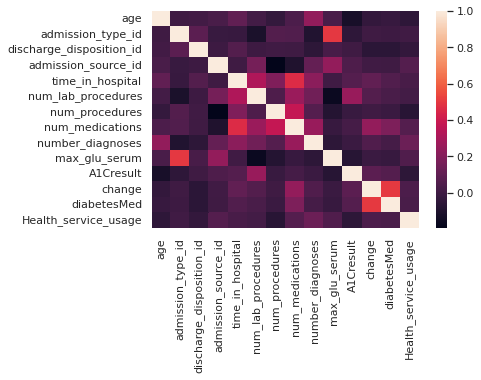

In [ ]:
sns.heatmap(X.corr())

In [ ]:
from sklearn.metrics import mean_squared_error, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
from catboost import CatBoostClassifier,Pool
X = diabetic_patients.drop(to_drop,axis=1)
y = diabetic_patients.readmitted
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=5,stratify=diabetic_patients.readmitted)

In [ ]:
cb_clf = CatBoostClassifier(iterations=500)
cb_clf.fit(X_train,y_train,cat_features=cat_features)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14d25b1ad0>]],
      dtype=object)

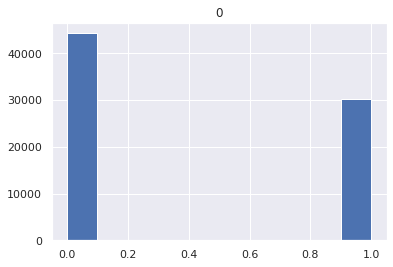

In [ ]:
y_train_pred = cb_clf.predict(X_train)
pd.DataFrame(y_train_pred).hist()


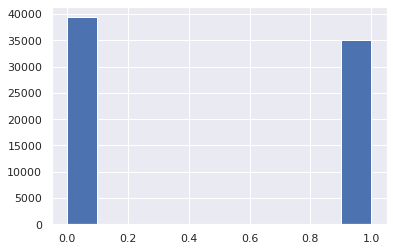

In [ ]:
y_train.hist()

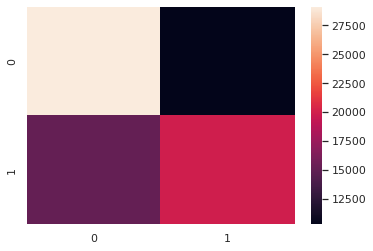

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_true=y_train, y_pred=cb_clf.predict(X_train)))

In [ ]:
confusion_matrix(y_true=y_train, y_pred=cb_clf.predict(X_train))

array([[29099, 10294],
       [15176, 19936]])

In [ ]:
#@title
y_pred_proba = cb_clf.predict_proba(X_train)
print('the logloss for the train data is:' ,log_loss(y_true=y_train,y_pred=y_pred_proba),
      'the accuracy score is: ', accuracy_score(y_true=y_train,y_pred=y_train_pred))

the logloss for the train data is: 0.6137448726729013 the accuracy score is:  0.6581437487416952


In [ ]:
#@title
y_pred_proba_test = cb_clf.predict_proba(X_test)
log_loss(y_true=y_test,y_pred=y_pred_proba_test)
print('the logloss for the test data is:' ,log_loss(y_true=y_test,y_pred=cb_clf.predict_proba(X_test)),
      'the accuracy score is: ', accuracy_score(y_true=y_test,y_pred=cb_clf.predict(X_test)))

the logloss for the test data is: 0.6347696089198124 the accuracy score is:  0.6343064223877593


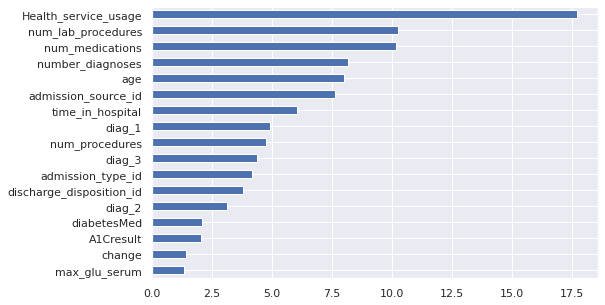

In [ ]:
fi = cb_clf.get_feature_importance(Pool(X_test, label=y_test,cat_features=cat_features))
fi_df = pd.DataFrame(fi,index=X_test.columns)
fi_df.sort_values(by=0,ascending=True).plot.barh(figsize=(8,5),legend=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)

In [ ]:
fi_df.sort_values(by=0,ascending=False)

,0
Health_service_usage,17.695303
num_lab_procedures,10.236801
num_medications,10.165034
number_diagnoses,8.178431
age,8.009707
admission_source_id,7.636326
time_in_hospital,6.041688
diag_1,4.914361
num_procedures,4.748320
diag_3,4.367795
